In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

fname = '/Users/alicebrindley/OneDrive - University of Exeter/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)
print(cube)

siconc=cube[2] 
print(siconc)

0: longitude / (degrees)               (latitude: 180; longitude: 360)
1: latitude / (degrees)                (latitude: 180; longitude: 360)
2: sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)
sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all ce

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


In [4]:

#extract Jan and Dec to average the sea ice concentration across these mon
add_month_number(siconc, 'time', name='month_number2')
cube2 = siconc[np.where((siconc.coord('month_number2').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season


<iris 'Cube' of sea_ice_area_fraction / (%) (time: 86; latitude: 180; longitude: 360)>

In [20]:
#identify the Ross Sea
#start of the loop
for i in range (0,2101-2015):
    cube3=cube2[i,:,:]
    west = -210 
    east = -110 
    south = -85 
    north = -69
    temporary_cube = cube3.intersection(longitude = (west, east)) 
    regional_cube = temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    #my_plot = iplt.contourf(regional_cube)
    #plt.gca().gridlines(draw_labels=True)
    #plt.show()


#extract the latitude I want to work with
    north_edge = regional_cube.extract(iris.Constraint(latitude=-70))
    #average across this latitude
    nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    #print(nE_mean.data)
    
    if nE_mean.data >=65:
        #define siconc for polynya
        polynya_threshold=regional_cube.data
        polynya = np.where((polynya_threshold.data <=20) & (nE_mean.data >=65))
        #print(polynya)
        polynya = polynya_threshold.data
        #plt.pcolormesh(polynya_threshold.data,vmin=0,vmax=100)
        #plt.show()


        #define a variable to hold the threshold number you are interested in
        polynya_threshold_value = 30.0
        #Take a copy of the seaice data that we are going to use to make a binary 'mask' showing presence of absense of polynyas as 1s and 0s
        polynya_location = polynya_threshold.data.copy()
        #set that land data in this mask to nan (Not a number) so we don;t get confused (these will show up white in a typical plot)
        polynya_location[np.where(polynya_location >= 1.0e9)] = np.nan
        #make water that has more ice than our polynia condition equal to zero.
        polynya_location[np.where((polynya_location <= 100.0) & (polynya_location > polynya_threshold_value))] = 0.0
        #make water that has less ice than our polynia condition equal to zero to make where the polynya is
        polynya_location[np.where((polynya_location > 0.0) & (polynya_location <= polynya_threshold_value))] = 1.0
        #plot this data
        #plt.pcolormesh(polynya_location,vmin=0,vmax=1)
        #plt.show()
        #Note in this 1st situation, we have not tested to make sure the northern edge has >30% seaice and it has not, so it is eroniously identify
    else:
        #print(cube3.coord('time'))

IndentationError: expected an indented block (3972540302.py, line 48)

In [6]:
fgname = ('/Users/alicebrindley/Downloads/fgco2_9.2.22/outfile')
fgcube = iris.load(fgname)
print(fgcube)

fgcube1=fgcube[0] 
print(fgcube1)

0: surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 1032; latitude: 180; longitude: 360)
surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 1032; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                                                                         x               -               -
        latitude                                                                     -               x               -
        longitude                                                                    -               -               x
    Cell methods:
        mean where sea                                                          area
        mean                                                                    time
    Attributes:
        CDI                                                                     Climate Data Interface version 2.0.3 (https://mpimet.mpg.de/cdi)
        CDO     

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


In [7]:
#extract Jan and Dec to average the sea ice concentration across these mon
add_month_number(fgcube1, 'time', name='month_number1')
fgcube2 = fgcube1[np.where((fgcube1.coord('month_number1').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(fgcube2, 'time', name='season_year')
#then average by the season year:
fgcube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season



<iris 'Cube' of surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 86; latitude: 180; longitude: 360)>

ValueError: Cannot resolve cubes, as a suitable transpose of the RHS cube 'surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon' will not broadcast with the LHS cube 'sea_ice_area_fraction'.

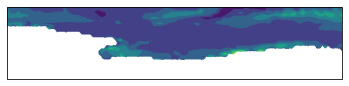

In [22]:
for i in range (0,2101-2015):
    fgcube3=fgcube2[i,:,:]
    west = -230
    east = -110
    south = -85
    north = -60
    fg_temporary_cube = fgcube3.intersection(longitude = (west, east)) 
    fg_regional_cube = fg_temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    my_plot = iplt.contourf(fg_regional_cube)
    #plt.gca().gridlines(draw_labels=True)
    #print(fgcube3.coord('time'))
    #plt.show()
    
    #multiply cubes together
    cube_result = iris.analysis.maths.multiply(regional_cube,fg_regional_cube)
    print(cube_result)
    